## Introduction ##

The used car market has always been a popular topic and several factors play an important role in determining the resale value of used cars.

Our project aims to explore the UK used car market by analyzing the factors that affect the resale value of used cars. The dataset we chose contains **nine CSVs categorized by car brands: audi, bmw, ford, hyundi, merc, skoda, toyota, vauxhall, vw**, each contains information on price, transmission, mileage, fuel type, road tax, miles per gallon (mpg), and engine size for popular car brands in the UK.

Please find the link to the dataset in Kaggle: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?datasetId=750216&sortBy=voteCount&select=ford.csv


###We aim to utilize EDA to achieve the following explorations:

- Identify the most popular car brand, registration year, and features among used car buyers in the UK.

- Examine the relationship between the age, mileage, and resale value of used cars.

###By modeling, we envision compeleing the following investigatrions:

- Evaluate the impact of fuel type, transmission type, road tax, and other features on the resale value of used cars.

- Develop a predictive model to estimate the resale value of used cars based on their features.

- Compare different models and identifying a model with the highest accuracy.

## Import Necessary Packages

In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading and preprocessing

###Read Data###

We begin by loading the dataset into the python notebook. The datasets are in the format of CSV files. Each CSV file corresponds to a car manufacturer.  

In [ ]:
# Read the dataset
audi_df = pd.read_csv('audi.csv')
bmw_df = pd.read_csv('bmw.csv')
ford_df = pd.read_csv('ford.csv')
hyundi_df = pd.read_csv('hyundi.csv')
merc_df = pd.read_csv('merc.csv')
skoda_df = pd.read_csv('skoda.csv')
toyota_df = pd.read_csv('toyota.csv')
vauxhall_df = pd.read_csv('vauxhall.csv')
vw_df = pd.read_csv('vw.csv')

###Check the Size of Raw Datasets###

Lets begin by inspecting the size of datasets in terms of number of rows.

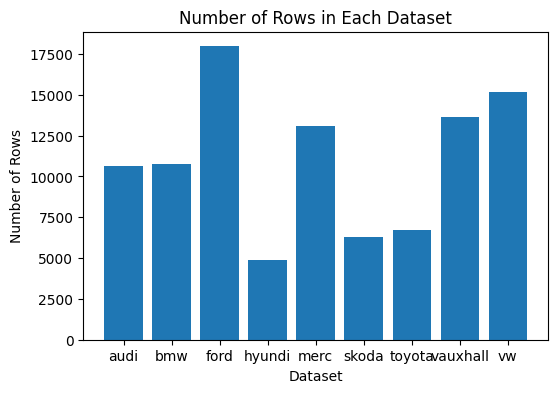

In [5]:
# Calculate the number of rows in each dataset
num_rows = [len(audi_df), len(bmw_df), len(ford_df), len(hyundi_df),
            len(merc_df), len(skoda_df), len(toyota_df), len(vauxhall_df), len(vw_df)]

# Create a barplot to show the number of rows in each dataset

plt.figure(figsize=(6,4))
plt.bar(['audi', 'bmw', 'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw'], num_rows)
plt.xlabel('Dataset')
plt.ylabel('Number of Rows')
plt.title('Number of Rows in Each Dataset')
plt.show()

As we can see, the size of datasets ranges from around 5000 to 17500.

###Check Columns###

Next, we would like to inspect the format and columns of each dataset to gain a better understanding. Lets first look at the first five rows of each dataset to see what kind of preprocessing is required.

In [6]:
# Display the first 5 rows of each dataset
audi_df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [7]:
bmw_df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [8]:
ford_df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [9]:
hyundi_df.head(5)

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [10]:
merc_df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [11]:
toyota_df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [12]:
vauxhall_df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4


In [13]:
vw_df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


By looking at the first five rows of each dataframe, we notice that all datafames have same columns **except in hyundi dataframe, there is a (£) sign after `tax` column**. 

We aim to merge these nine dataframes to form a comprehensive dataframe containing all the car brands for future analysis, therefore we need to standardize the column names.

###Standardize Column Names###

In [14]:
hyundi_df = hyundi_df.rename(columns={"tax(£)": "tax"})
hyundi_df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


###Merge Dataframes into One###

We would like to examine and model the datasets as a whole to gain overall understanding of the UK used car market. 

The original datasets don't have their brand names as a column. In order to preserve this information after merging, we need to create a new column 'brand' and assign the brand names before merging.

In [15]:
audi_df['brand'] = 'audi'
bmw_df['brand'] = 'bmw'
ford_df['brand'] = 'ford'
hyundi_df['brand'] = 'hyundi'
merc_df['brand'] = 'merc'
skoda_df['brand'] = 'skoda'
toyota_df['brand'] = 'toyota'
vauxhall_df['brand'] = 'vauxhall'
vw_df['brand'] = 'vw'

Merge the datasets into one

In [16]:
frames = [audi_df, bmw_df, ford_df, hyundi_df, merc_df, skoda_df, toyota_df, vauxhall_df, vw_df]
usedcar_df = pd.concat(frames)

In [17]:
usedcar_df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi


###Check Nulls and Duplicates###

We will find the number of rows with null values and the number of duplicated rows to see if there is any need of further preprocessing.

In [18]:
num_nulls = usedcar_df.isna().any(axis=1).sum()
num_nulls

0

There is no null value in the dataset.

In [19]:
num_dups = usedcar_df[usedcar_df.duplicated()].any(axis=1).count()
num_dups

1475

There are some duplicates in the dataset. Lets inspect their distribution in the individual datasets.

In [20]:
datasets = {'audi': audi_df, 'bmw': bmw_df, 'ford': ford_df, 'hyundi': hyundi_df,
            'merc': merc_df, 'skoda': skoda_df, 'toyota': toyota_df, 'vauxhall': vauxhall_df, 'vw': vw_df}

for name, df in datasets.items():
    num_duplicates = df.duplicated().sum()
    print(f'{name}: {num_duplicates} duplicates')

audi: 103 duplicates
bmw: 117 duplicates
ford: 154 duplicates
hyundi: 86 duplicates
merc: 259 duplicates
skoda: 79 duplicates
toyota: 39 duplicates
vauxhall: 374 duplicates
vw: 264 duplicates


The duplicates are spread pretty evenly across the raw dataset. Lets take a closer look at them.

In [21]:
usedcar_df[usedcar_df.duplicated()].head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
273,Q3,2019,34485,Automatic,10,Diesel,145,47.1,2.0,audi
764,Q2,2019,22495,Manual,1000,Diesel,145,49.6,1.6,audi
784,Q3,2015,13995,Manual,35446,Diesel,145,54.3,2.0,audi
967,Q5,2019,31998,Semi-Auto,100,Petrol,145,33.2,2.0,audi
990,Q2,2019,22495,Manual,1000,Diesel,145,49.6,1.6,audi


Since the mileage and price are contiuous numerical values, they are unlikely to be exactly the same for two different transactions. They are more likely to be duplicated values of the same transaction. Thus, We decide to drop the duplicated values.

####Drop Duplicates####

In [22]:
usedcar_df = usedcar_df.drop_duplicates()

In [23]:
usedcar_df[usedcar_df.duplicated()].any(axis=1).count()

0

All duplicates have been removed from the dataframe.

###Remove Outliers
We need to check if there is any obvious outliers in the data.

In [24]:
# Get information about the merged dataframe usedcar_df
usedcar_df.info()

usedcar_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97712 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   brand         97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.2+ MB


,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066870,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.122993,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


The describe() function reveals more descriptive statistics of the dataframe. One thing worth noticing is the max value of the variable `year` **(registration year)** is 2060, which does not make sense. Therefore we need to drop rows where the value of year is larger than 2023.

In [25]:
usedcar_df = usedcar_df[usedcar_df['year'] <= 2023]
usedcar_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,97711.000000,97711.000000,97711.000000,97711.000000,97711.000000,97711.000000
mean,2017.066431,16773.592748,23219.152224,120.141540,55.205750,1.664916
std,2.118556,9868.547939,21060.747641,63.356993,16.181693,0.558576
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.000000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2020.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


## EDA


### Which Car Model is the Most Popular?

We are curious to know which model has been the most popular during the time span, therefore we create a barplot to visualize the count of each model. We aim to create visualization for the top 10 popular car models. 

According to the histogram, we discover that **Fiesta by Ford** is the most popular car model, followed by **Golf by VW** and **Focus by Ford**.

In [26]:
model_df= usedcar_df.groupby('model')['model'].count().reset_index(name='count').sort_values(['count'], ascending=False)
model_df

,model,count
60,Fiesta,6508
75,Golf,4797
61,Focus,4555
32,C Class,3694
52,Corsa,3285
...,...,...
10,A2,1
131,Ranger,1
163,Transit Tourneo,1
17,Accent,1


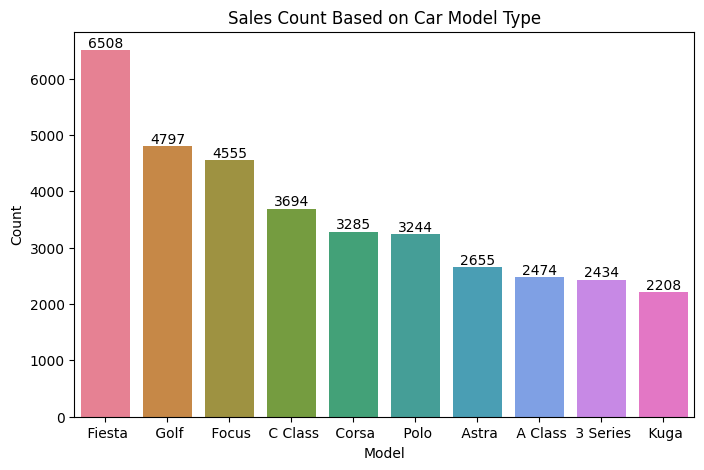

In [27]:
figure, axis = plt.subplots(figsize = (8, 5))
plot = sns.barplot(x = model_df['model'].head(10), y = model_df['count'].head(10), palette = 'husl', errorbar = None)
plot.set(title ='Sales Count Based on Car Model Type', xlabel ='Model', ylabel = "Count")

for i in plot.containers:
    plot.bar_label(i,)

### What is the most popular registration year among used cars in the market? ####

We are interested in learning more about the age of cars available in the market. To do so, we analyzed the popular registration years of used cars in the market. After tallying the number of sales for each year, we found that **2019** was the most frequently occurring year. This suggests a trend of people selling their cars after three years of ownership.

To better visualize the data, we created a bar plot that displays the top 10 most popular registration years and their corresponding counts.

In [28]:
year_df= usedcar_df.groupby('year')['year'].count().reset_index(name='count').sort_values(['count'], ascending=False)
year_df

,year,count
24,2019,26165
22,2017,21616
21,2016,15724
23,2018,13570
20,2015,7586
19,2014,4053
25,2020,4040
18,2013,2590
17,2012,633
16,2011,432


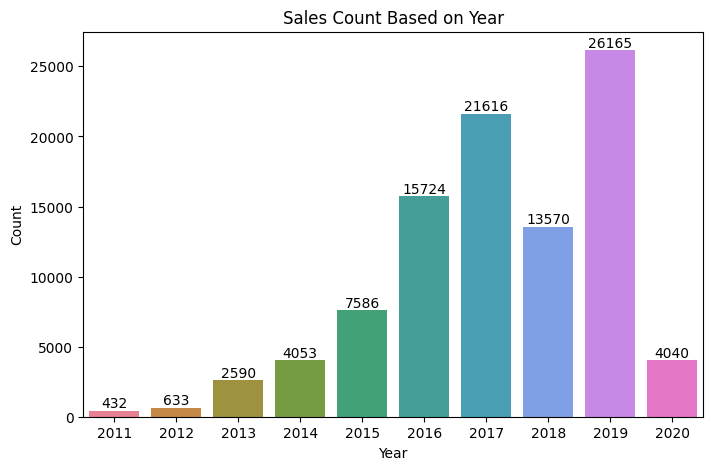

In [29]:
figure, axis = plt.subplots(figsize = (8, 5))
plot = sns.barplot(x = year_df['year'].head(10), y = year_df['count'].head(10), palette = 'husl', errorbar = None)
plot.set(title ='Sales Count Based on Year', xlabel ='Year', ylabel = "Count")

for i in plot.containers:
    plot.bar_label(i,)

### What are the ratios for each type of transmission?

By looking at the dataset, there are four types of transmission: automatic, semi-auto, manual, and others. We are curious about what percentage each transmission type is, and therefore want to visulizae using a pie chart.

The result indicates that **manual is the most common transmission type (57%)**, **semi-auto is the second most common (23%)**, **automatic is the third (20%)**, and others is the rarest.

In [30]:
transmission_df= usedcar_df.groupby('transmission')['transmission'].count().reset_index(name='count').sort_values(['count'], ascending=False)
transmission_df

,transmission,count
1,Manual,55502
3,Semi-Auto,22296
0,Automatic,19904
2,Other,9


([<matplotlib.patches.Wedge at 0x7ffa08d5a280>,
 [Text(-0.2332821615988998, 1.0749788058746763, 'Manual'),
  Text(-0.4550986732727858, -1.0014415597454254, 'Semi-Auto'),
  Text(0.8819571082652223, -0.6573824299298295, 'Automatic'),
  Text(1.0999999539254877, -0.0003183770172356805, 'Other')],
 [Text(-0.1272448154175817, 0.5863520759316415, '57%'),
  Text(-0.24823563996697404, -0.546240850770232, '23%'),
  Text(0.48106751359921207, -0.3585722345071797, '20%'),
  Text(0.5999999748684478, -0.00017366019121946207, '0%')])

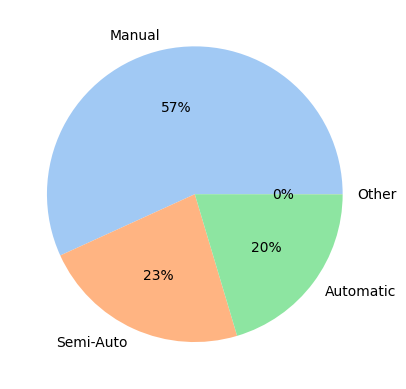

In [31]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(transmission_df["count"], labels = transmission_df["transmission"], autopct='%.0f%%', colors=colors)

 ### Price by Brand

we decided to examine the prices by brand to identify any trends or differences in pricing across different brands. To accomplish this, we created a boxplot that visualized the distribution of prices for each brand, with the x-axis representing each brand and the y-axis representing the price range.

Upon examining the boxplot, we noticed that the price range for **Mercedes-Benz** was higher than the other brands, followed closely by **Audi** and **BMW**. This suggests that these three brands may be more expensive in the used car market compared to other brands. We also observed that **each brand had some outliers**, which may indicate the presence of some unique or rare models that command a higher price.

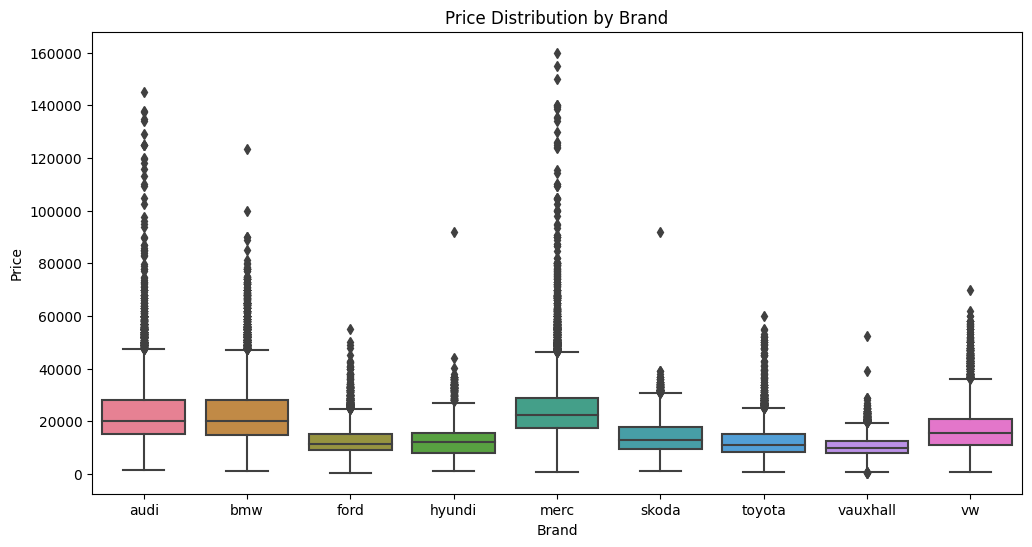

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=usedcar_df, x='brand', y='price', palette='husl')
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()


### Violin Plot of Mileage by Fuel Type

We can create a violin plot to visualize the distribution of mileage for each fuel type. This will help us compare the overall range and density of mileage values for different fuel types. The x-axis represents the five fuel types: petrol, diesel, hybrid, other, and electric, while the y-axis represents the mileage range.

Upon examining the violin plot, we can compare the overall range and density of mileage values for each fuel type. **Petrol fuel type** shows a wider distribution of mileage values, indicating a larger market inventory. **Diesel cars** have some high mileage data points, which may be attributed to the fact that diesel cars are often used as commercial vehicles. Additionally, we can observe that there are **no electric cars with high mileage**. This may be due to the relatively new introduction of electric cars to the market.



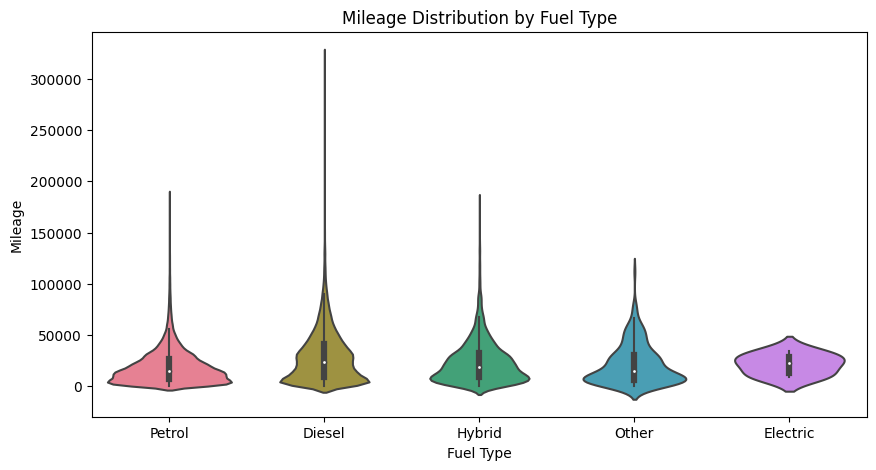

In [33]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=usedcar_df, x='fuelType', y='mileage', palette='husl')
plt.title('Mileage Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.show()


### Scatterplot of Price vs. Mileage

We can create a scatterplot to visualize the relationship between the price and mileage of used cars. This will help us identify any potential correlation or trend between the two variables.

Upon examining the scatterplot, we can observe **a correlation between mileage and the maximum price**. We can also see that **there are affordable cars at all mileage ranges**. However, **at higher mileage, even premium cars like Mercedes and BMW are selling for less**.

These observations suggest that **mileage is an important factor to consider when purchasing a used car**, as it can **have a significant impact on the price**. Additionally, we can conclude that the brand name alone does not always determine the price of a used car, as even luxury cars may have lower prices at higher mileage ranges.

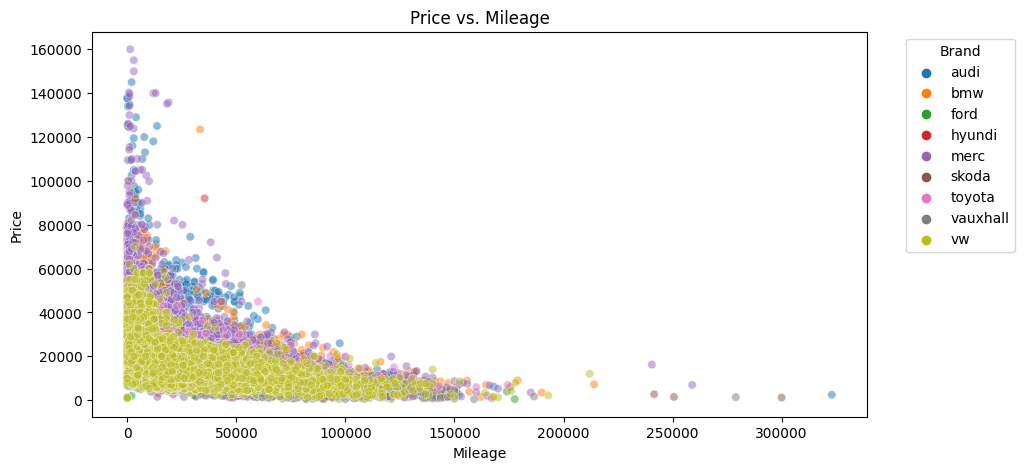

In [34]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=usedcar_df, x='mileage', y='price', hue='brand', alpha=0.5)
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Brand')
plt.show()

##Feature engineering##
Before modeling, we would like to perform feature engineering to extract features from raw data via data mining techniques based on what we learned in EDA. 
These features can be used to improve the performance of machine learning algorithms.

###One hot encoding###

Our goal is to develop a regression model to predict the price of used cars in the UK market. However, to enhance the performance of machine learning algorithms, we must first process the numerous categorical features in our dataset. To begin, we need to identify the categorical data present in our dataset.

In [35]:
usedcar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97711 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97711 non-null  object 
 1   year          97711 non-null  int64  
 2   price         97711 non-null  int64  
 3   transmission  97711 non-null  object 
 4   mileage       97711 non-null  int64  
 5   fuelType      97711 non-null  object 
 6   tax           97711 non-null  int64  
 7   mpg           97711 non-null  float64
 8   engineSize    97711 non-null  float64
 9   brand         97711 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.2+ MB


model, transmission, fuelType, and brand are the categorical features in our dataframe. we decided to use one hot encoding over other methods because it creates binary columns for each category, thus avoiding any numerical bias that may arise from using label encoding. 

One hot encoding ensures that each category is represented as a separate binary feature, which can improve the accuracy and performance of our regression model. Additionally, since we have relatively few categorical features in our dataset, one hot encoding is a suitable approach that won't result in an excessive increase in the dimensionality of the data.

Based on pie chart, we noticed there are too few 'other' transmission type


In [36]:
usedcar_df['transmission'].value_counts()['Other']

9

We can drop the 'others' to reduce dimention after one hot encoding

In [37]:
usedcar_df = usedcar_df[usedcar_df['transmission'] != 'Other']

Additionally, we noticed there are many potential value for "model"

In [38]:
len(usedcar_df.model.unique())

195

The feature "model" contains a large number of distinct values, which poses a challenge for preprocessing using one hot encoding. This approach would create an additional 195 features, potentially resulting in overfitting of our regression model. To mitigate this issue, we recommend grouping similar categories together. 

In this case, we can group car models into their respective brands since the brand value is still captured. Additionally, other features such as transmission, engineSize, and mpg should provide information on the difference between high-end and entry-level models. By grouping similar categories together, we can reduce the number of unique values and potentially improve the performance of our regression model.

In [39]:
usedcar_df = usedcar_df.drop('model', axis=1)

Create the one hot encoding with pd.get_dummies()

In [40]:
encoded_usedcar_df = pd.get_dummies(usedcar_df, columns=['transmission', 'fuelType', 'brand'])

In [41]:
encoded_usedcar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97702 entries, 0 to 15156
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    97702 non-null  int64  
 1   price                   97702 non-null  int64  
 2   mileage                 97702 non-null  int64  
 3   tax                     97702 non-null  int64  
 4   mpg                     97702 non-null  float64
 5   engineSize              97702 non-null  float64
 6   transmission_Automatic  97702 non-null  uint8  
 7   transmission_Manual     97702 non-null  uint8  
 8   transmission_Semi-Auto  97702 non-null  uint8  
 9   fuelType_Diesel         97702 non-null  uint8  
 10  fuelType_Electric       97702 non-null  uint8  
 11  fuelType_Hybrid         97702 non-null  uint8  
 12  fuelType_Other          97702 non-null  uint8  
 13  fuelType_Petrol         97702 non-null  uint8  
 14  brand_audi              97702 non-null

We ended up with a dataframe of 21 features, which is a reason amount of dimensionality.

##Modeling##
In this section, we will experiment with different Regression Models to predict the used car price.

###Preprocessing###

In [42]:
from sklearn.model_selection import train_test_split

Split the data where features are all in one dataframe and the target "price" is in its separated dataframe.

In [43]:
features = encoded_usedcar_df.drop('price', axis=1)
target = encoded_usedcar_df['price']

Using sklearn's train_test_split function to split data for regression into train and test sets with a 80-20 split.

In [44]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

###Linear Regression###

Linear Regression serves as a foundational model to understand and predict the relationship between the features and the target variable (price). We will train a model with default parameters as our baseline model.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

Measure the R-squared (The coefficient of determination) score of the model. It measures the proportion of variance in the traget variable  that can be explained by the independent (features) variables. 
R-squared ranges from 0 to 1, where a higher indicates a better fit of the model to the data.

In [46]:
lin_acc = reg.score(X_test, y_test)
lin_acc

0.7619718584985797

Another immportant metric is Root Mean Squared Error(RMSE). It gives us an idea of how far off the predicted values are from the actual values, and by taking the square root, it makes the error metric more interpretable in the same units as the response variable. By minimizing the RMSE, we can find the linear regression model that is most accurately predicting the outcome variable, and is therefore the most useful for making predictions or identifying important features that drive the outcome variable.

In [47]:
# get RMSE by setting squared=False
lin_rmse = mean_squared_error(y_test, y_pred, squared=False)
lin_rmse

4841.924818983463

Linear Regression Analysis:

Despite the mediocre R-squared score on the Used Car Prices dataset, Linear Regression is still a valuable technique due to its simplicity and interpretability. Linear Regression is a straightforward model that establishes a linear relationship between the features and the target variable, making it easy to understand and implement. Additionally, it produces coefficients for each feature that can provide insights into how different factors influence car prices. However, Linear Regression has limitations. When features are highly correlated, the model can produce unstable coefficient estimates, leading to overfitting and poor generalization to new data. Multicollinearity may exist among some features in the Used Car Prices dataset, such as engine size, tax, and mpg, which can adversely affect the model's accuracy. Moreover, Linear Regression is sensitive to outliers, which can distort the model's estimates and lower its predictive power.

###Ridge Regression ($L_2$)###

Since linear regression doesn't do well, we suspect the model is suffering overfitting. To overcome that issue, we would like to introduce $L_2$ reguration, which introduces a regularization term to the cost function. We will use the Ridge class in scikit-learn to perform $L_2$ Regularized Linear Regression.

We will use StandardScaler to helps to ensure that all of the input features are on the same scale, since thats the assumption that ridge regression based on.
By using standard scaler to normalize the input features, we can ensure that they all have zero mean and unit variance, which puts them on the same scale and ensures that the penalty term in ridge regression is applied equally to all features 

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

####Hyperparameter Tuning####
The parameter alpha in ridge regression controls the amount of regularization applied to the model, and it is important to search for the best alpha value to balance bias and variance and prevent overfitting or underfitting. By using cross-validation to evaluate the model's performance with different alpha values, we can determine the optimal alpha that produces the best predictions on new, unseen data. 

In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Create a Ridge regression object
ridge = Ridge()

# Define the grid of alpha values to test
param_grid = {'alpha': [0.01, 0.1, 1, 10, 50, 80, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(scaled_x_train, y_train)

# Get the best value of alpha
best_alpha = grid_search.best_params_['alpha']

We found the best alpha value using five fold cross validation.

In [51]:
best_alpha

50

Train the model with best_alpha

In [52]:
reg_ridge = Ridge(alpha=best_alpha)

reg_ridge.fit(scaled_x_train, y_train)
y_pred = reg_ridge.predict(scaled_x_test)

In [53]:
ridge_score = reg_ridge.score(scaled_x_test, y_test)
ridge_score

0.7619701205213183

In [54]:
# get RMSE by setting squared=False
ridge_rmse = mean_squared_error(y_test, y_pred, squared=False)
ridge_rmse

4841.942495758619

Ridge Regression Analysis:

Ridge Regression is a useful technique for addressing multicollinearity and controlling model complexity in the context of the Used Car Prices case. By reducing overfitting and making the model more robust to noise, Ridge Regression can improve the model's generalization performance. However, despite its benefits, we found that Ridge Regression with L2 regularization did not show significant improvement over the base linear regression model in terms of R-squared and RMSE, even with hyperparameter tuning. This may be because Ridge Regression does not perform feature selection and cannot set coefficients to zero like L1 regularization. As a result, all features remain in the model, which can limit the model's interpretability.


###LASSO ($L_1$)###

After finding that L2 regularization did not provide significant improvement over the base linear regression model, we decided to try L1 regularization as an alternative technique to improve the performance of the model. L1 regularization adds the sum of absolute values of coefficients to the objective function, which can result in sparsity by setting some coefficients to zero. This feature selection can help to improve the interpretability of the model and potentially improve its performance. Furthermore, L1 regularization can be more effective than L2 regularization when the dataset has a large number of features, as it can reduce the impact of irrelevant or redundant features on the model's performance. By trying L1 regularization after L2 was ineffective, we aim to explore different approaches to improve the model's performance and find the best technique for this specific dataset.

####Hyperparameter Tuning####
Similar to Ridge, the parameter alpha in LASSO regression controls the amount of regularization applied to the model, and it is important to search for the best alpha value to balance bias and variance and prevent overfitting or underfitting. Again we will use cross-validation to evaluate the model's performance with different alpha values.

In [55]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

# Create a LassoCV object with 5-fold cross-validation
lasso_cv = LassoCV(cv=5)

# Fit the model to the training data
lasso_cv.fit(scaled_x_train, y_train)

# Get the best value of alpha
best_alpha = lasso_cv.alpha_


We found the best alpha value using five fold cross validation.

In [56]:
best_alpha

6.298178250218522

Train the model with best_alpha

In [57]:
lasso = Lasso(alpha=best_alpha)

# Fit the model to the training data
lasso.fit(scaled_x_train, y_train)

# Predict the target variable for the test data
y_pred = lasso.predict(scaled_x_test)

In [58]:
lasso_score = lasso.score(scaled_x_test, y_test)
lasso_score

0.7619489480739252

In [59]:
# get RMSE by setting squared=False
lasso_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasso_rmse

4842.157833205826


LASSO (L1) Analysis:

LASSO, which uses L1 regularization, can help address both multicollinearity and feature selection in the Used Car Prices dataset. It can shrink the coefficients of less important features and set some of them to zero, effectively removing irrelevant features from the model. This simplification can improve the model's interpretability and potentially enhance its performance.

However, despite its benefits, we found that Lasso Regression with L1 regularization did not show significant improvement over the base linear regression model and L2 regularization in terms of R-squared and RMSE, even with hyperparameter tuning. It is possible that L1 regularization did not improve the results for our model due to various reasons. Firstly, the effectiveness of L1 regularization depends on the structure of the dataset and the relationship between the features and the target variable. It is possible that the features in our dataset did not have strong correlations with the target variable or that the correlations were not captured well by the linear model, which may have limited the impact of the regularization. Secondly, it is possible that other techniques such as data preprocessing or feature selection may be more effective for this dataset, and therefore, L1 regularization did not provide any significant improvement.


###PCA###

After L1 and L2 regularization techniques failed to improve the performance of the Linear Regression model, we decided to explore the use of Principal Component Analysis (PCA) to address the issue of multicollinearity and reduce the dimensionality of the dataset. PCA is a dimensionality reduction technique that can help identify the most significant features in the dataset and transform them into a smaller set of uncorrelated variables known as principal components. By reducing the number of features in the dataset, PCA can help mitigate the effects of multicollinearity and simplify the model, potentially improving its performance. Furthermore, PCA can help remove noise and redundancies in the data, which can improve the accuracy and interpretability of the model. Therefore, we chose to apply PCA before fitting the Linear Regression model to the Used Car Prices dataset in an attempt to improve its performance.

We will be utilizing the PCA package from Sklearn, which requires the standardized training and testing dataset to avoid scale-related issues. In order to determine the optimal number of Principal Components to select, we will conduct an analysis. For now, we will retain all Principal Components.

In [60]:
from sklearn.decomposition import PCA
pca = PCA()
pca_x_train = pca.fit_transform(scaled_x_train)

We have created an array to store the explained variance ratios, and then computed the cumulative explained variance ratios. This information will be used to determine the appropriate number of Principal Components to include in the model.

In [61]:
explained_variance_ratios = pca.explained_variance_ratio_

cum_evr = np.cumsum(explained_variance_ratios)

We will plot a graph to visualize the relationship between the number of components and the cumulative explained variance ratio.

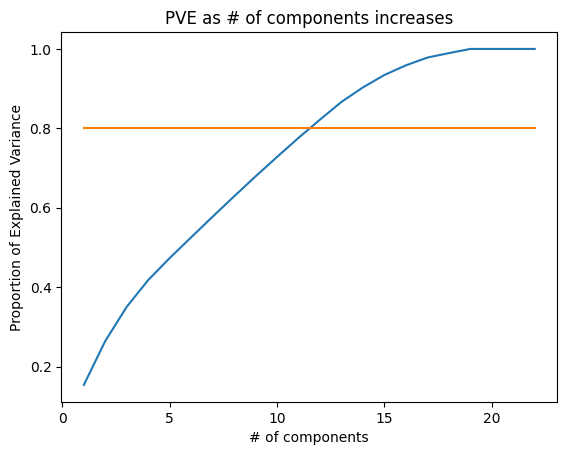

In [62]:
plt.plot(np.arange(1, 23), cum_evr)
plt.plot(np.arange(1, 23), [0.80]*22)
plt.xlabel("# of components")
plt.ylabel("Proportion of Explained Variance")
plt.title("PVE as # of components increases")
plt.show()

According to the plot, the number of components needed to explain at least 80% of the variance is 12, which corresponds to the component at index 11 in the array.

In [63]:
cum_evr[11]

0.8220042823035744

####PCA with Linear Regression####
With the parameter n=12, we can now transform the dataset with PCA and re-fit it with Linear Regression.

In [64]:
n = 12
# 1. Refit and transform on training with parameter n (as deduced from the last step) 
pca = PCA(n_components=n)
X_train_pca = pca.fit_transform(scaled_x_train)

# 2. Transform on Testing Set and store it as `X_test_pca`
X_test_pca = pca.transform(scaled_x_test)

In [65]:
reg = LinearRegression()
reg.fit(X_train_pca, y_train)
y_pred = reg.predict(X_test_pca)

In [66]:
pca_acc = reg.score(X_test_pca, y_test)
pca_acc

0.6704652680220585

In [67]:
# get RMSE by setting squared=False
pca_rmse = mean_squared_error(y_test, y_pred, squared=False)
pca_rmse

5697.108444342037



After applying PCA to the used car prices dataset, the R2 score decreased from 0.76 to 0.67. This reduction in performance could be due to several reasons. Firstly, PCA assumes that the relationships between the features are linear. If the dataset contains non-linear relationships, PCA may not effectively capture the variance in the data. Secondly, by retaining only 80% of the cumulative variance, some information may have been lost, resulting in a less precise model.

####PCA with Ridge Regression ($L_2$)####

After our unsuccessful attempt with PCA and normal linear regression, we decided to explore the use of PCA with ridge regression. The L2 regularization provided by ridge regression can help reduce overfitting by penalizing large coefficients, which can be particularly beneficial when dealing with high-dimensional datasets. Furthermore, since PCA can help reduce the number of features in the dataset, it may be more effective when combined with a regularization technique like ridge regression. By combining these techniques, we hope to achieve a better balance between model complexity and performance on the used car prices dataset.

In [68]:
reg_ridge = Ridge(alpha=10)

reg_ridge.fit(X_train_pca, y_train)
y_pred = reg_ridge.predict(X_test_pca)


In [69]:
pca_ridge_score = reg_ridge.score(X_test_pca, y_test)
pca_ridge_score

0.6704650130575269

In [70]:
# get RMSE by setting squared=False
pca_ridge_rmse = mean_squared_error(y_test, y_pred, squared=False)
pca_ridge_rmse

5697.110648298348

After attempting PCA with ridge regression on our used car dataset, it appears that the linear model is still not able to adequately fit the data. This suggests that the dataset may not be suitable for linear modeling techniques, and it may be necessary to explore alternative modeling approaches. While it is possible that additional preprocessing steps or feature engineering could improve the performance of the linear model, it may also be worthwhile to consider more complex models such as decision trees.

###Random Forest Regressor###
We have decided to explore other modeling techniques. One such technique is the Random Forest Regressor, which is known for its ability to handle nonlinear relationships between variables and its robustness to outliers. This model uses decision trees to build a collection of models and then averages their predictions to produce the final result. By using this approach, we hope to obtain a more accurate and reliable model for our dataset. We will also evaluate the performance of this model and compare it to the previous attempts to determine the best approach for our analysis.






In [71]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model with default parameters and fit it on the training set
reg_rf = RandomForestRegressor()

# Use the model to predict on the test set
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

In [72]:
rfr_score = reg_rf.score(X_test, y_test)
rfr_score

0.9395117888148703

In [73]:
# get RMSE by setting squared=False
rfr_rmse = mean_squared_error(y_test, y_pred, squared=False)
rfr_rmse

2440.839706730076

Analysis:

The decision tree model's outstanding performance, with an R2 score of 0.94, highlights its effectiveness compared to linear models, which had an R2 score of 0.76. This excellent performance can be attributed to several factors. Firstly, Random Forest can determine the importance of each feature in predicting the target variable (price) by quantifying the impact of the features like the car's age (year), mileage, engine size, and brand. Secondly, Random Forest can capture the non-linear relationships between features like transmission types, fuel types, and brands more effectively due to being an ensemble of decision trees. Moreover, Random Forest models are less prone to overfitting due to the averaging of multiple decision trees, which can result in a more generalizable model that can predict prices for new data points better. Random Forest is also robust to outliers, making it suitable for datasets with cars with exceptionally high or low prices. Finally, Random Forest models can handle both categorical and continuous variables, making them suitable for diverse features present in the used car prices dataset.

However, using Random Forest has some trade-offs. Firstly, the model can be challenging to interpret compared to linear models due to its complex structure, which can be a drawback for stakeholders who want to understand the relationships between variables and the target (price) more transparently. Secondly, Random Forest models can take longer to train, particularly when there are many trees in the ensemble or the dataset is large, increasing the overall time required to develop and deploy the model.

In conclusion, despite the trade-offs, Random Forest has proven to be an effective choice for the Used Car Prices case scenario, and its benefits outweigh its drawbacks for this dataset.

###XGBoost###
After noticing that Random Forest produced satisfactory results and Linear Regression did not, we decided to explore XGBoost as an alternative. The dataset appeared to be more accurately represented by non-linear models. XGBoost is another ensemble method that aggregates the predictions of multiple decision trees to arrive at a final prediction. However, XGBoost creates decision trees in a different way than Random Forest. Instead of using bagging, XGBoost utilizes gradient boosting, which involves building decision trees sequentially. Each subsequent tree is trained to correct the errors made by the previous tree. This technique enables XGBoost to capture more intricate relationships between the features and the target variable, making it more effective in modeling complex datasets.

In [74]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = xgb.predict(X_test)

In [75]:
xgb_score = xgb.score(X_test, y_test)
xgb_score

0.9433107592237125

In [76]:
# get RMSE by setting squared=False
xgb_rmse = mean_squared_error(y_test, y_pred, squared=False)
xgb_rmse

2362.948243882911

After comparing the performance of XGBoost and Random Forest on our used car dataset, we observed that XGBoost yielded slightly better results. The R2 score for XGBoost was 0.943, which is marginally higher than the 0.940 score obtained by Random Forest. The RMSE is slight better too with a value of 2362 comparing to Random Forest's 2441. XGBoost's gradient boosting algorithm can provide a more refined and precise model by sequentially improving the fit of each tree in this case. While the difference in performance between the two models is not significant, the slightly better performance of XGBoost could make it a preferable option for use cases where small improvements in accuracy are crucial.

##Comparing Models##
After attempting three models and different regularization and feature selection techniques, we would like compare their performance in terms of $R^2$ and RMSE score.

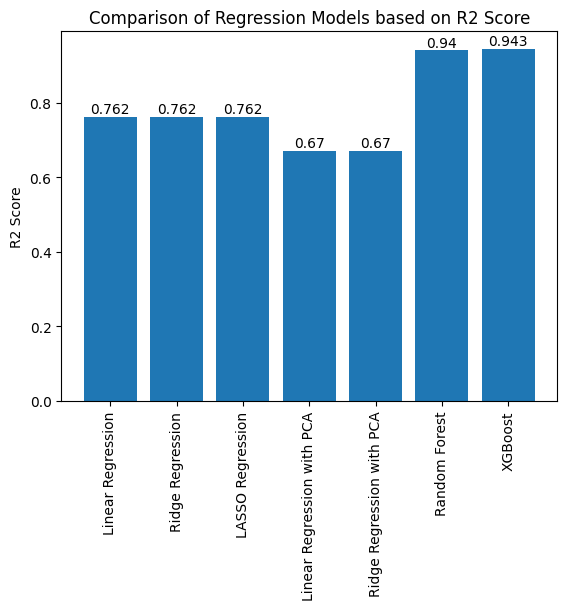

In [77]:
# create arrays of R2 and RMSE scores for each model
R2_scores = [lin_acc, ridge_score, lasso_score, pca_acc, pca_ridge_score, rfr_score, xgb_score]
RMSE_scores = [lin_rmse, ridge_rmse, lasso_rmse, pca_rmse, pca_ridge_rmse, rfr_rmse, xgb_rmse]

# create labels for the models
models = ['Linear Regression', 'Ridge Regression', 'LASSO Regression', 'Linear Regression with PCA', 'Ridge Regression with PCA', 'Random Forest', 'XGBoost']

# create a bar chart for R2 scores
fig, ax = plt.subplots()
ax.bar(models, R2_scores)
ax.set_ylabel('R2 Score')
ax.set_title('Comparison of Regression Models based on R2 Score')

for i, v in enumerate(R2_scores):
    ax.text(i, v+0.01, str(round(v, 3)), ha='center')

_ = plt.xticks(models, models, rotation='vertical')
plt.show()

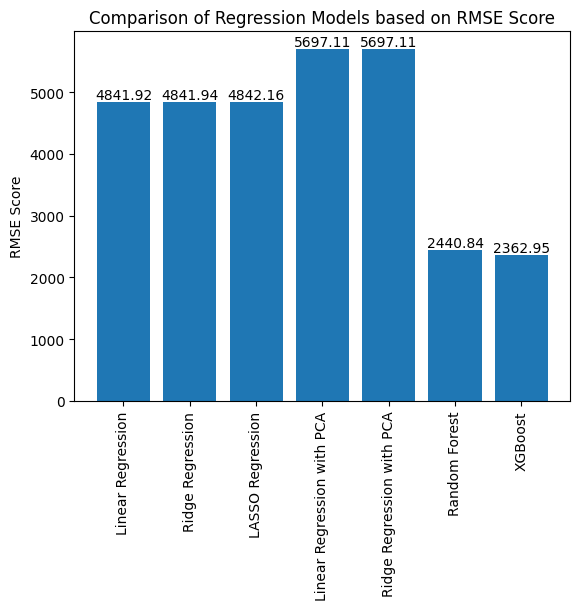

In [78]:
# create a bar chart for RMSE scores
fig, ax = plt.subplots()
ax.bar(models, RMSE_scores)
ax.set_ylabel('RMSE Score')
ax.set_title('Comparison of Regression Models based on RMSE Score')
for i, v in enumerate(RMSE_scores):
    ax.text(i, v+50, str(round(v, 2)), ha='center')

_ = plt.xticks(models, models, rotation='vertical')
plt.show()


Based on the R2 scores, Random Forest (0.940) and XGBoost (0.943) outperform the other models, including Linear Regression, Ridge Regression, LASSO Regression, and PCA-based models. These two ensemble methods are better able to capture the non-linear relationships between the features and the target variable in the dataset.

In terms of RMSE scores, XGBoost (2362.95) performs slightly better than Random Forest (2440.84), indicating that it can more accurately predict the prices of used cars. However, it is worth noting that Random Forest has a faster training time and can handle larger datasets more efficiently than XGBoost.

Overall, both Random Forest and XGBoost demonstrate strong performance in predicting the prices of used cars. In this case, we should choose XGBoost based on its higher score and lower lost.






## Summary ##

After analyzing EDA and the performance of the various models on the Used Car Prices dataset, we can draw the following conclusions:

###EDA (Exploratory Data Analysis)###

1. For the most popular car model, Fiesta by Ford ranks first, followed by Golf by Volkswagen and Focus by Ford.

2. 2019 is the year when the number of used car sales is the highest.

3. For the transmission type, manual is the most common transmission type, semi-auto is the second most common, automatic is the third, and others is the rarest.

4. The price range for Mercedes-Benz was the highest, followed closely by Audi and BMW. We also observed that each brand had some outliers, which may indicate the presence of some unique or rare models that command a higher price.

5. Petrol fuel type shows a wider distribution of mileage values, indicating a larger market inventory. Diesel cars have some high mileage data points, which may be attributed to the fact that diesel cars are often used as commercial vehicles. Additionally, we can observe that there are no electric cars with high mileage.

6. We observe a correlation between mileage and the maximum price. We can also see that there are affordable cars at all mileage ranges. However, at higher mileage, even premium cars like Mercedes and BMW are selling for less.

 Mileage is an important factor to consider when purchasing a used car, as it can have a significant impact on the price. Additionally, we can conclude that the brand name alone does not always determine the price of a used car, as even luxury cars may have lower prices at higher mileage ranges.

###Modeling###

1. Linear Regression serves as a good starting point due to its simplicity, interpretability, and computational efficiency. However, it may struggle with multicollinearity, non-linear relationships, and outliers, limiting its predictive performance.

2. Ridge Regression (L2) and LASSO (L1) offer improvements over Linear Regression by introducing regularization, which can help mitigate multicollinearity and overfitting. However, the improvement in performance over Linear Regression is marginal, suggesting that the linear model may not be suffering from overfitting. Instead, the reduced performance could be attributed to other factors, such as feature selection or the inherently non-linear nature of the dataset.

3. PCA can be useful for reducing the dimensionality of the data, but in this case, it resulted in a significant loss of predictive performance. Combining PCA with Ridge Regression did not provide any noticeable improvements, suggesting that PCA may not be necessary for this dataset.

4. Random Forest and XGBoost models significantly outperformed the other models, with both achieving high R-squared scores. These tree-based models are capable of handling non-linear relationships and complex interactions between features, making them well-suited for this dataset.

5. Although Random Forest and XGBoost had similar performance, XGBoost offers some advantages, such as built-in regularization and the ability to handle missing values. Additionally, XGBoost can be more computationally efficient when properly tuned, making it a strong choice for this case.

In summary, for the Used Car Prices dataset, tree-based models like Random Forest and XGBoost deliver the best predictive performance. While simpler models like Linear Regression and Ridge Regression provide valuable insights and are more interpretable, their performance is limited by the complexity of the dataset. Considering the balance between accuracy, interpretability, and computational efficiency, XGBoost emerges as the most suitable model for this case.

## Challenges / Obstacles Faced ##

1. **Handling categorical data**: One of the challenges we faced was dealing with categorical data for regression models. Initially, we considered using one-hot encoding to represent the categories, but we soon realized that the model column had 195 unique values, which would lead to too many dimensions and could cause overfitting. We decided to drop the model column altogether and instead used other relevant features such as brand, price, and engine size to represent the information. This approach helped us overcome the issue of high dimensionality and resulted in better model performance.

2. **Poor performance of linear regression**: Another challenge we encountered was the poor performance of the linear regression model. Despite using L1 and L2 regularization and performing hyperparameter tuning, we only saw minimal improvement in the model's accuracy. We attempted to use Principal Component Analysis (PCA) to select better features for the linear model, but this approach did not lead to significant improvements in performance and even resulted in a decrease in performance in some cases. We eventually overcame this issue by using tree-based models like Random Forest and XGBoost, which were able to capture the non-linear relationships in the data and resulted in much better performance. We concluded that the dataset was too complex for a linear model to handle, despite our best efforts to optimize it.

## Potential Next Steps & Future Directions ##


In this Used Car Project, we have performed a thorough analysis of the dataset, applied various models to predict used car prices, and identified XGBoost as the most suitable model for this task. Moving forward, there are several potential next steps and future directions that can be taken to further enhance the project.



1.   **Feature Engineering:** Investigating additional feature engineering techniques can improve the model's performance by creating new features or transforming existing ones. Specifically, consider the following:

*   **Creating interaction features between existing variables to capture their combined effect on the target.** This may help reveal hidden patterns and relationships that are not evident when considering features individually.
*   **Applying non-linear transformations, such as log or polynomial, to continuous variables to better capture non-linear relationships.** These transformations may make the data more compatible with the assumptions of certain models, leading to improved performance.
2. **Hyperparameter Optimization:** To further enhance the performance of the XGBoost model, a more systematic approach to hyperparameter tuning can be employed. Techniques like Grid Search or Random Search can be utilized to find the best combination of hyperparameters, which may lead to improved model performance and generalization.
3. **Model Stacking or Blending:** Combining the predictions from multiple models, such as Random Forest and XGBoost, has the potential to improve prediction accuracy. Exploring model stacking or blending techniques will create an ensemble model that leverages the strengths of different models to deliver better results.
4. **Addressing Class Imbalance:** If the dataset contains a class imbalance in categorical features, such as fuel types or transmission types, it may be necessary to balance the dataset to improve the model's performance in predicting underrepresented categories. Techniques to consider include:
*   Oversampling the minority class
*   Undersampling the majority class
*   Using advanced sampling methods like SMOTE
5. **Time Series Analysis:** If temporal information is present in the dataset, such as car prices over time, incorporating time series analysis techniques can help capture trends and seasonality in the data. This may result in improved model predictions by accounting for time-dependent patterns.
6. **Alternative Models:** Exploring other machine learning models, such as neural networks or support vector machines, may yield different insights and potentially improve prediction accuracy. By comparing the performance of various models, you can make an informed decision about which model is best suited for the task at hand.
7. **Model Interpretability:** Investigating techniques to enhance the interpretability of the XGBoost model can help stakeholders better understand the relationships between variables and the target (price). Techniques such as SHAP values or LIME can be used to make the model more transparent and easier to interpret.
8. **External Data Sources:** Integrating external data sources, like macroeconomic indicators, consumer trends, or regional factors, may provide additional context and improve the model's predictive performance. By incorporating relevant external data, the model can account for a broader range of factors that influence used car prices.
9. **Model Evaluation Metrics:** In addition to R-squared and Root mean squared error (RMSE), other evaluation metrics can be considered to assess model performance from different perspectives. Some metrics to consider include:
*   Mean absolute error (MAE)
*   Mean squared logarithmic error (MSLE)
10. **Model Deployment:** After identifying and fine-tuning the optimal model, develop a strategy for deploying the model in a production environment. This could include a web application or API that enables real-time predictions for users. By making the model accessible and easy to use, you can increase the impact and value of your project.

By focusing on these potential next steps and future directions, we can continue to refine the Used Car Project, ultimately leading to a more accurate and robust predictive model for used car prices. As we explore these avenues, it is essential to iteratively evaluate the impact of each change on the model's performance and make informed decisions based on our findings. This will ensure that the project continues to evolve and adapt to new insights and challenges, ultimately leading to a more comprehensive and impactful solution for predicting used car prices. 

Since the end goal is not only to develop a highly accurate model but also to provide stakeholders with valuable insights and a user-friendly tool that can be applied in real-world scenarios. By striking a balance between accuracy, interpretability, and usability, we will ensure that this Used Car Project delivers tangible benefits and serves as a valuable resource for users interested in understanding and predicting used car prices.